THE SPARKS FOUNDATION

AUTHOR :- GAURAV JOSHI

TSF_Task-1 : Prediction using Supervised ML Predict the percentage of an student based on the no. of study hour

What will be predicted score if a student studies for 9.25 hrs/ day?

I used Python

Dataset: http://bit.ly/w-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.shape

(25, 2)

In [5]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [7]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

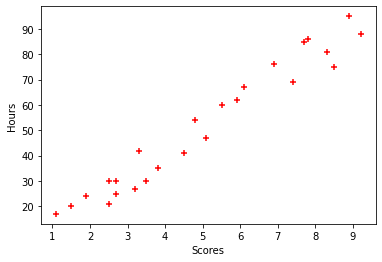

In [8]:
%matplotlib inline
plt.xlabel("Scores")
plt.ylabel("Hours")
plt.scatter(x = df.Hours,y = df.Scores,color = "red",marker = "+")
plt.show()

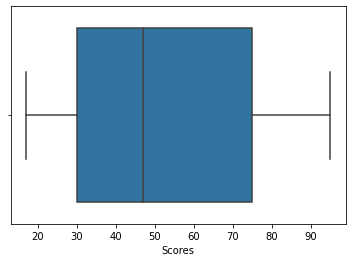

In [9]:
sns.boxplot(df.loc[:,"Scores"])

No Outliers are present data is clean

Sklearn Linear Regression Model and Spliting data to training and test


In [10]:
from sklearn.model_selection import train_test_split
#Splitting training and testing data
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values
x_train, x_test, y_train, y_test= train_test_split(x, y,test_size=0.2)

In [11]:
print("X_train size:" ,x_train.size)
x_train


X_train size: 20


array([[3.2],
       [4.8],
       [1.9],
       [2.5],
       [1.1],
       [7.7],
       [4.5],
       [2.7],
       [6.9],
       [8.5],
       [9.2],
       [8.3],
       [3.5],
       [7.4],
       [6.1],
       [3.8],
       [1.5],
       [5.5],
       [7.8],
       [5.9]])

In [12]:

x_test

array([[3.3],
       [5.1],
       [8.9],
       [2.5],
       [2.7]])

Training the Model

In [13]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train, y_train)
y_predict= reg.predict(x_test)

For linear regression equation is y = mx+c where

m is slope of the line

x is the independent variable here it is Hours

y is dependent variable here it is Scores

c is the intercept

In [14]:
#slope
reg.coef_

array([9.80241975])

In [15]:
reg.intercept_

1.7655624939018182

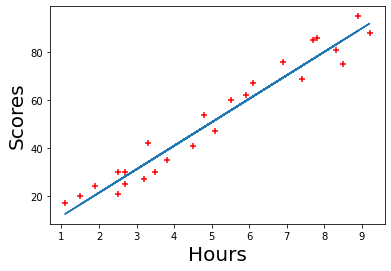

In [16]:
plt.xlabel("Hours", fontsize = 20)
plt.ylabel("Scores", fontsize= 20)
# Plotting the regression line
#  Y = mX + C
line = reg.coef_*x+reg.intercept_
# Plotting for the test data
plt.scatter(x, y, color = "red", marker = "+")
plt.plot(x, line);
plt.show()

In [17]:
print("Accuracy of Test Score: ",reg.score(x_test, y_test))
print("Accuracy of Training Score: ",reg.score(x_train, y_train))

Accuracy of Test Score:  0.9523401798605791
Accuracy of Training Score:  0.9522221980586747


Checking the  Accuracy


In [18]:
print("Accuracy of Test Score: ",reg.score(x_test, y_test))
print("Accuracy of Training Score: ",reg.score(x_train, y_train))

Accuracy of Test Score:  0.9523401798605791
Accuracy of Training Score:  0.9522221980586747


Comparing Actual Values And predictions.

In [21]:
data= pd.DataFrame({'Actual': y_test,'Predicted': y_predict})
data

,Actual,Predicted
0,42,34.113548
1,47,51.757903
2,95,89.007098
3,30,26.271612
4,30,28.232096


In [22]:
print('Score of student who studied for 9.25 hours a data', reg.predict([[9.25]]))

Score of student who studied for 9.25 hours a data [92.43794517]
